In [30]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

#for vector graphic images
%config InlineBackend.figure_format ='svg'

In [31]:
options = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolov2.weights',
    'threshold': 0.3 #confidence factor to draw bounding boxes

}

tfnet = TFNet(options)

C:\Users\palash\Desktop\darkflow-master\darkflow\dark\darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.03598213195800781s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bn

In [32]:
img = cv2.imread('image.jpg')

result = tfnet.return_predict(img)

result
#by default it is converted to BGR
#plt.imshow(img)
#plt.show()

[{'bottomright': {'x': 212, 'y': 156},
  'confidence': 0.7743962,
  'label': 'dog',
  'topleft': {'x': 63, 'y': 45}}]

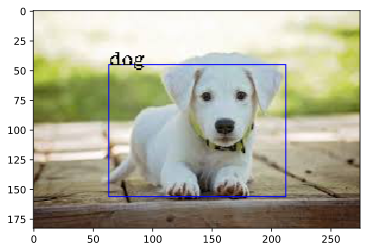

In [33]:
t = (result[0]['topleft']['x'], result[0]['topleft']['y'])
b = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])

label = result[0]['label']
#to draw rectangle on image
img = cv2.rectangle(img, t, b, (255,0,0), 1)
img = cv2.putText(img, label, t, cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0), 1)

#convert BGR to RGB (original image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()